# Discourse analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,8)

essays = pd.read_csv("C:\\Speicher\\Uni\\SocialMediaAnalysis\\ChatGBT\\preprocessed_data.csv", sep=";", encoding="UTF-8")
discourse = pd.read_csv("C:\\Speicher\\Uni\\SocialMediaAnalysis\\ChatGBT\\data\\connectives_discourse_markers_PDTB.txt", sep="\'", encoding="UTF-8", header=None, usecols = [1,3])

print(discourse[1])

def apply_discourse_markers(text):
    i = 0
    for marker in discourse.itertuples():
        if marker[1] in text:
            i += text.count(marker[1])
    return i

essays["Student discourse"] = essays["Student Essay"].apply(lambda x: apply_discourse_markers(x))
essays["ChatGPT 0.2 discourse"] = essays["ChatGPT Essay 0.2"].apply(lambda x: apply_discourse_markers(x))
essays["ChatGPT 0.9 discourse"] = essays["ChatGPT Essay 0.9"].apply(lambda x: apply_discourse_markers(x))

print(essays)

def plot_not_smooth(x, y, label, color):
    plt.plot(x, y, label = label, color = color)

0           about
1     accordingly
2     additionaly
3           after
4       afterward
         ...     
79        whether
80          while
81           with
82        without
83            yet
Name: 1, Length: 84, dtype: object
    Unnamed: 0.1  Unnamed: 0         File  \
0              0           0  essay01.txt   
1              1           1  essay02.txt   
2              2           2  essay03.txt   
3              3           3  essay04.txt   
4              4           4  essay05.txt   
..           ...         ...          ...   
85            85          85  essay86.txt   
86            86          86  essay87.txt   
87            87          87  essay88.txt   
88            88          88  essay89.txt   
89            89          89  essay90.txt   

                                               Source  \
0   http://www.essayforum.com/writing-feedback-3/e...   
1   http://www.essayforum.com/writing-feedback-3/e...   
2   http://www.essayforum.com/writing-feedback-3/e...  

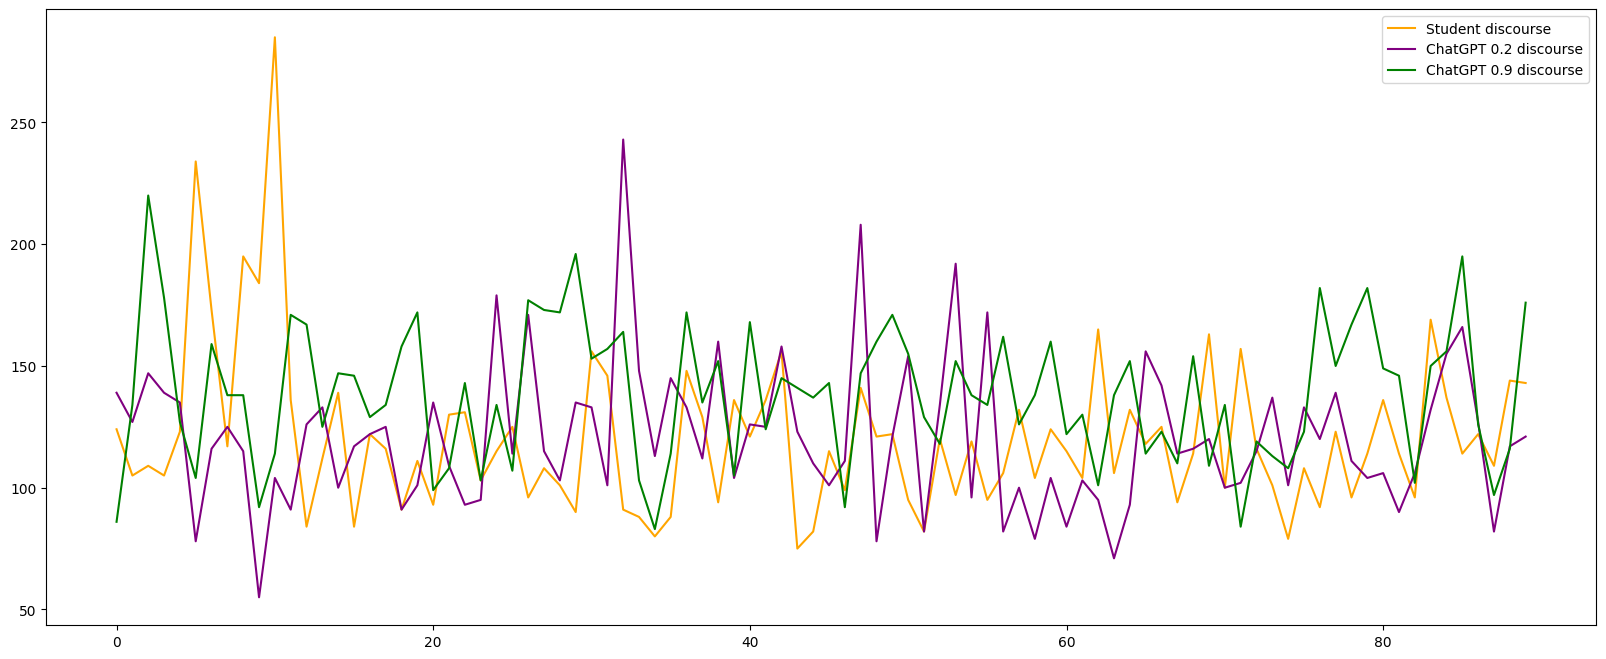

In [2]:
plot_not_smooth(essays["Unnamed: 0"], essays["Student discourse"], "Student discourse", "orange")
plot_not_smooth(essays["Unnamed: 0"], essays["ChatGPT 0.2 discourse"], "ChatGPT 0.2 discourse", "purple")
plot_not_smooth(essays["Unnamed: 0"], essays["ChatGPT 0.9 discourse"], "ChatGPT 0.9 discourse", "green")
plt.legend()
plt.show()

90
[2.8333333333333335, 1.0, 2.2666666666666666, 0.14444444444444443, 0.34444444444444444, 0.37777777777777777, 1.0, 0.37777777777777777, 2.1777777777777776, 0.43333333333333335, 0.0, 0.03333333333333333, 0.1111111111111111, 0.7777777777777778, 0.06666666666666667, 0.16666666666666666, 0.6777777777777778, 0.0]
90
[3.2555555555555555, 1.0555555555555556, 2.466666666666667, 0.2777777777777778, 0.34444444444444444, 0.7555555555555555, 1.0, 0.5222222222222223, 2.3222222222222224, 0.6555555555555556, 0.0, 0.011111111111111112, 0.2111111111111111, 0.9888888888888889, 0.2, 0.23333333333333334, 0.8444444444444444, 0.0]
90
90
90


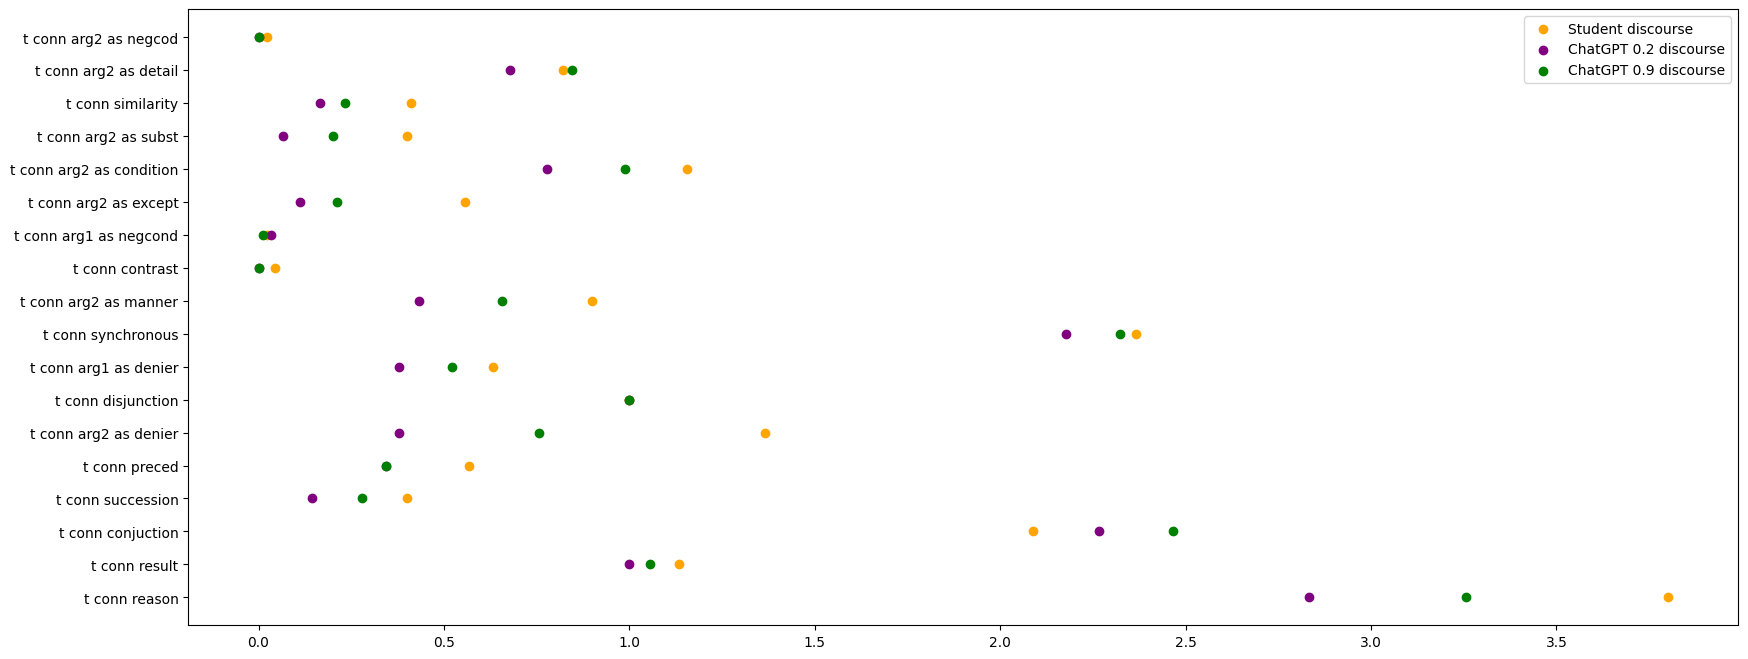

In [3]:
all_modals = []
for marker in discourse.itertuples():
    if not any(marker[2] in modal for modal in all_modals):
        all_modals.append(marker[2])


def identify_discourse_markers(text):
    temp = []
    for marker in discourse.itertuples():
        if marker[1] in text:
            temp.append(marker[2])
    result = []
    for i in range(len(all_modals)):
        result.append(temp.count(all_modals[i]))
    return result

def calculate_sum(label):
    extracted_essays = essays[label].apply(lambda x: identify_discourse_markers(x))
    print(str(len(extracted_essays)))
    res = list()
    for j in range(0, len(extracted_essays[0])):
        tmp = 0
        for i in range(0, len(extracted_essays)):
            tmp = tmp + extracted_essays[i][j]
        res.append(tmp)
    for x in range(0, len(res)):
        res[x] = np.divide(res[x],len(extracted_essays))
    return res    

def plot_modals(x, y, label, color):
    y_ = []
    for i in range(len(y)):
        y_.append(y[i].replace('_', ' '))
    plt.scatter(x, y_, label = label, color = color)

print(calculate_sum("ChatGPT Essay 0.2"))
print(calculate_sum("ChatGPT Essay 0.9"))
plot_modals(x = calculate_sum("Student Essay"), y = all_modals, label = "Student discourse", color = "orange")
plot_modals(x = calculate_sum("ChatGPT Essay 0.2"), y = all_modals, label = "ChatGPT 0.2 discourse", color = "purple")
plot_modals(x = calculate_sum("ChatGPT Essay 0.9"), y = all_modals, label = "ChatGPT 0.9 discourse", color = "green")
plt.legend()
plt.show()

